----

# 두개의 상호작용이 있는 다중회귀모형

url : http://rpubs.com/cardiomoon/153265

## 1. Mtcars Dataset

MASS패키지에 포함되어 있는 자동차의 연비에 대한 데이터 셋이다. 

1. MPG(Mile Per Gallon) : 연비
1. Cyl(Number of Cylinder) : 실린더 번호
1. Disp(Displacement) : 배기량
1. HP(Gross Housepower) : 총 마력
1. Drat(Rear Axle Ratio) : 비율대
1. Wt(Weight) : 공차중량
1. Qsec(1/4 Mile Time) : 1/4마일
1. Vs(Engine) : V형태는 0, 직선형은 1
1. Am(Transmission) : 기어변환, 자동형은 0, 수동은 1
1. Gear(Number of Forward Gears) : 전방기어 번호
1. Carb(Number of Carburetors) : 기화기 번호

In [1]:
require(MASS)
head(mtcars)
str(mtcars)

Loading required package: MASS


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


# 2. 두개의 연속형 변수와 범주형 변수

이번에는 두개의 연속형 변수의 상호작용을 갖는 다중회귀 모형을 경우를 생각해보자. mpg를 반응변수로 wt(공차중량), hp(마력수) 및 상호작용을 설명변수로 하는 회귀모형을 만들면 다음과 같다.

In [3]:
fit3 <- lm(mpg~wt+hp, data=mtcars)
summary(fit3)


Call:
lm(formula = mpg ~ wt + hp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12


In [2]:
fit2 <- lm(mpg~wt*hp, data=mtcars)
summary(fit2)


Call:
lm(formula = mpg ~ wt * hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt:hp        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


hp와 mpg 간의 회귀공식은 wt의 값에 따라 달라진다. wt값의 사분위수를 알아보면 다음과 같다.

In [3]:
summary(mtcars$wt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.513   2.581   3.325   3.217   3.610   5.424 

가장 가벼운 차는 1.513 가장 무거운 차는 5.424이다. wt와 mpg 사이의 회귀공식은 hp에 따라 달라지므로 다음과 같은 회귀식을 얻을 수 있다.
$$ mpg=49.81 -0.12\times{hp} -8.22\times{wt} +0.03\times{wt}\times{hp} $$

wt 값이 평균인 3.2일때 회귀공식은 다음과 같이 구할 수 있다.

$$ mpg=49.81 -0.12\times{hp} - 8.22\times{3.2} + 0.03\times{3.2}\times{hp} $$
$$ mpg=23.51 - 0.03\times{hp} $$

wt의 평균과 3.2 및 평균 +- 표준편차인 2.2, 4.2를 이용하여 상호작용을 시각화하면 다음과 같다.

In [13]:
A <- c(2.2, 3.2, 4.2)
coef <- fit2$coef
label <- as.character(A)
intercept <- coef[1]+ coef[2]*A
slope <- coef[3] + coef[4]*A

intercept
slope

[1] 31.73185 23.51523 15.29860

[1] -0.058836165 -0.030988016 -0.003139868

In [14]:
colour = rainbow(length(A))
df1 = data.frame(A, intercept, slope, colour)
df1

A,intercept,slope,colour
2.2,31.73185,-0.058836165,#FF0000FF
3.2,23.51523,-0.030988016,#00FF00FF
4.2,15.29860,-0.003139868,#0000FFFF


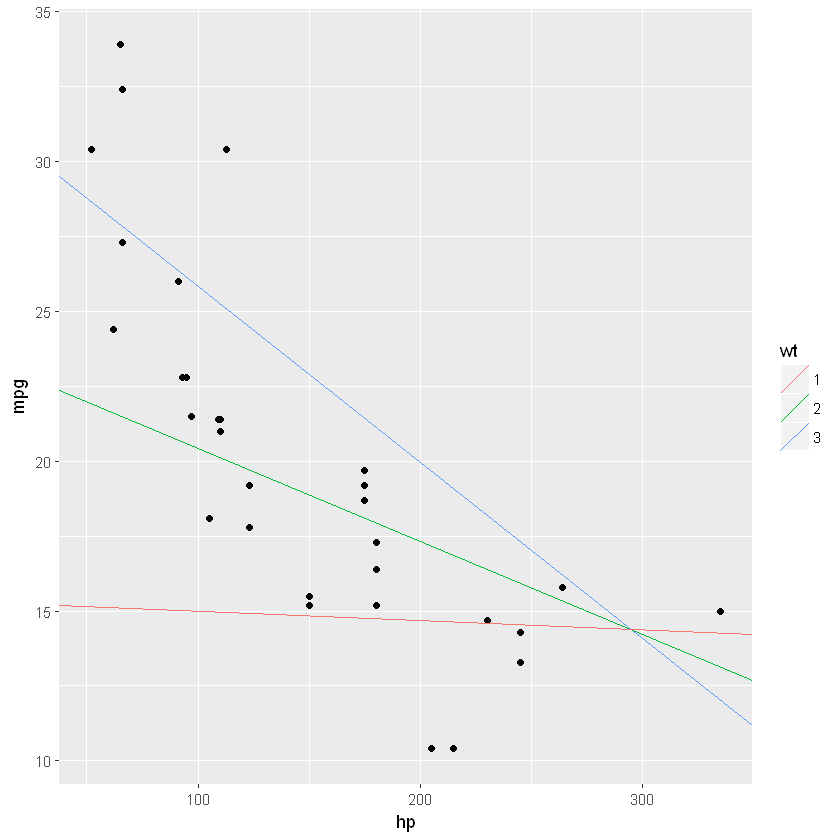

In [31]:
require(ggplot2)
p <- ggplot(data=mtcars, aes(x=hp, y=mpg)) + geom_point()
p <- p + geom_abline(data=df1, aes(slope=slope, intercept=intercept, colour=colour))
p <- p + scale_colour_discrete(labels=labels) + labs(colour="wt")
p

위의 상호작용을 시각화 해주는 plot을 함수화하면 다음과 같다.

In [99]:
ggEffect <- function(fit, x=1, probs=c(0.25, 0.5, 0.75), point=TRUE, xvalue=NULL){
    df = fit$model
    coef = fit$coef
    name = colnames(df)
    
    p <- ggplot(data=df, aes_string(x=name[1+x], y=name[1]))
    if(is.null(xvalue)) A=quantile(df[[length(df)+1-x]], probs, na.rm=T) 
    else A=xvalue    
    
    lables = as.character(A)
    intercept = coef[1] + coef[4-x]*A
    slope = coef[1+x] + coef[4]*A
    colour = rainbow(length(A))    
    df1 = data.frame(A, intercept, slope, colour)
    
    if(point) p<-p + geom_point()
    
    p <- p + geom_abline(data = df1, aes(slope=slope, intercept=intercept, colour=colour))
    p <- p + scale_colour_discrete(label=label) + labs(colour=name[4-x])
    p
    
}

x=1이면 첫번째 설명변수를 x축에 할당하고, x=2이면 두번째 설명변수를 할당한다. 아무값도 없을 경우 c(0.25, 0.5, 0.75)에 해당하는 quantile값을 구해 회귀직선을 그린다. xvalue에 값이 있다면 그 값으로 회귀직선을 그린다.

3

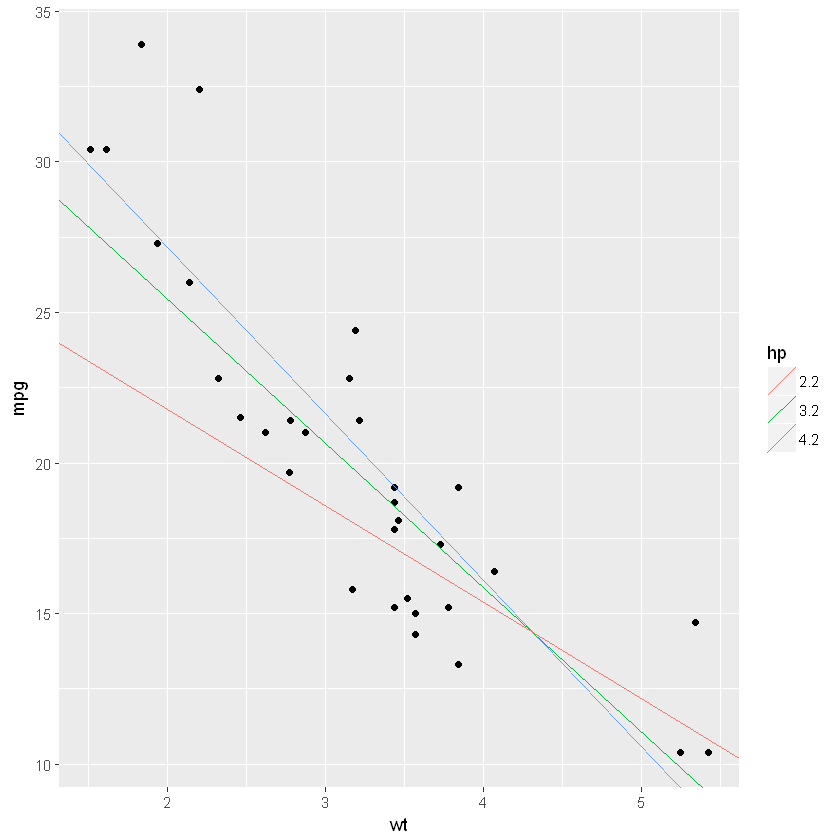

In [100]:
ggEffect(fit2)

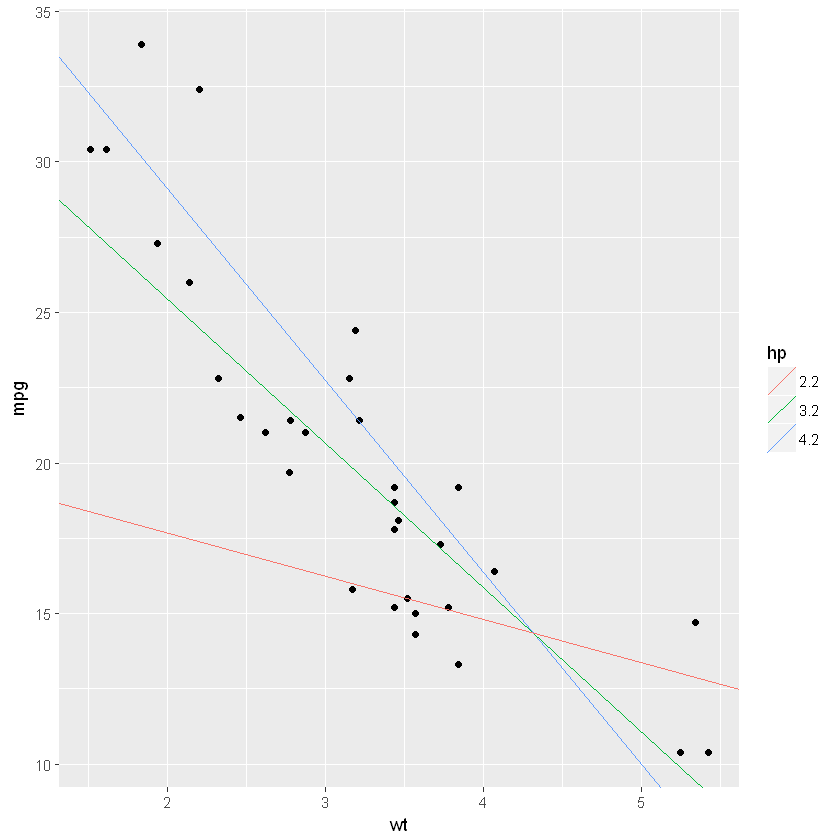

In [54]:
ggEffect(fit2, probs=c(0.1, 0.5, 0.9))

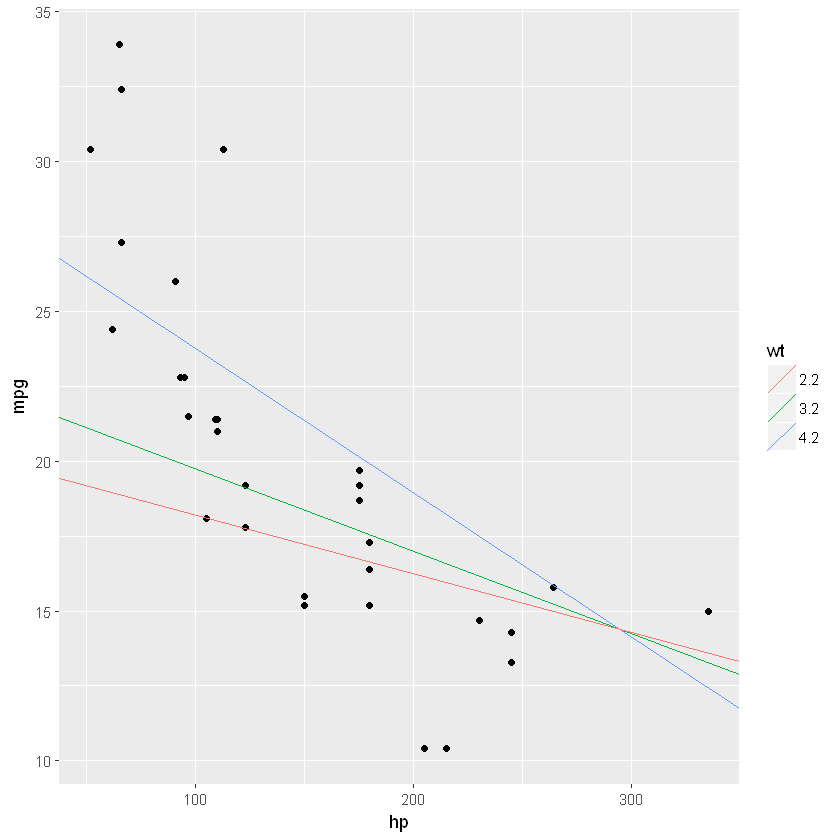

In [56]:
ggEffect(fit2, x=2)

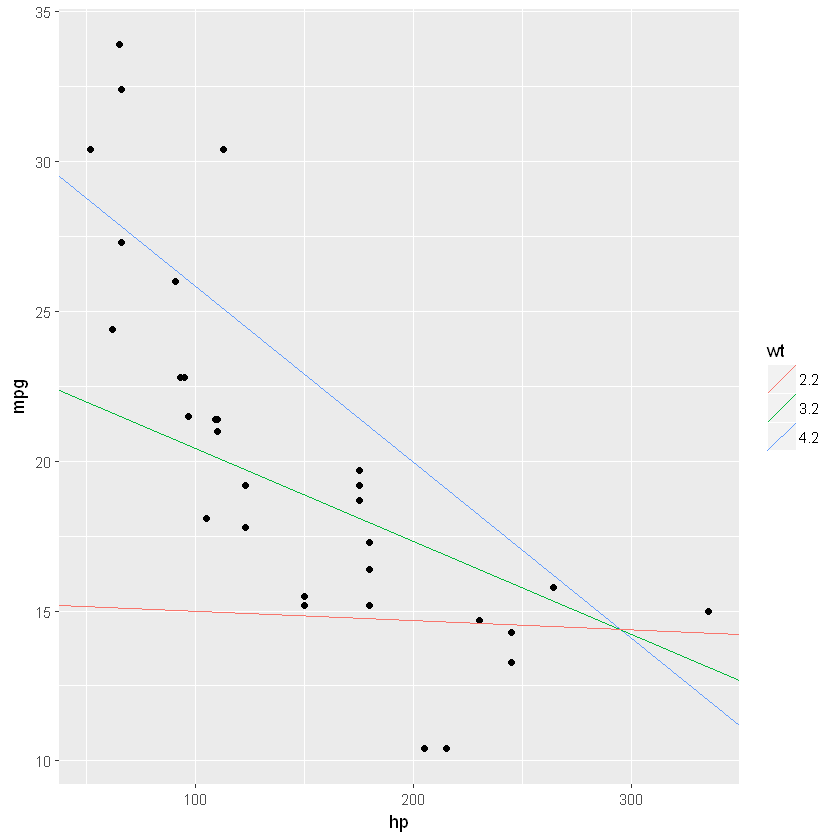

In [58]:
ggEffect(fit2, x=2, xvalue=c(2.2, 3.2, 4.2))

----